In [ ]:
pip install newspaper3k

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from newspaper import Article
from nltk import pos_tag, word_tokenize
from urllib.request import urlopen
from urllib.parse import urlsplit
from pathlib import Path
from bs4 import BeautifulSoup
import nltk
import re

all_tokens = []

def get_transcript(url):
    article = Article(url)
    article.download()
    article.parse()
    text = article.text

    data = urlopen(url).read()
    soup = BeautifulSoup(data, 'html.parser')
    content = soup.find('section', class_='body-content')

    tokens = [word_tokenize(sent) for sent in nltk.sent_tokenize(text)]
    tagged = [pos_tag(sent) for sent in tokens]

    # Extract the year from the URL using regular expression
    year_match = re.search(r'/(\d{4})-', url)
    
    if year_match:
        year = year_match.group(1)

        folder = Path('singjupost')
        filename = folder / (f'{year}_{urlsplit(url).path.replace("/", "_")}.txt')
        folder.mkdir(exist_ok=True)

        with open(filename, 'w') as f:
            for sent in tagged:
                for w, t in sent:
                    print(w, t, sep='_', end=' ', file=f)
                print(file=f)

        all_tokens.extend(tokens)

links = [
    'https://singjupost.com/full-transcript-tim-cook-at-apple-wwdc-2020-keynote/?singlepage=1',
    'https://singjupost.com/full-transcript-tim-cook-at-apple-wwdc-2019-keynote/?singlepage=1',
    'https://singjupost.com/tim-cook-at-apple-wwdc-2018-keynote-full-transcript/?singlepage=1',
    'https://singjupost.com/apple-ceo-tim-cook-keynote-at-wwdc-2017-full-transcript/?singlepage=1',
    'https://singjupost.com/apple-ceo-tim-cook-keynote-at-wwdc-2016-full-transcript/?singlepage=1',
    'https://singjupost.com/apple-wwdc-2015-keynote-special-event-june-2015-full-transcript/?singlepage=1',
    'https://singjupost.com/apple-ceo-tim-cook-keynote-wwdc-june-2014-transcript/?singlepage=1',
    'https://singjupost.com/apple-ceo-tim-cook-keynote-wwdc-june-2013-conference-transcript/?singlepage=1',
    'https://singjupost.com/steve-jobs-introduces-iphone-4-facetime-at-wwdc-2010-full-transcript/?singlepage=1',
    'https://singjupost.com/steve-jobs-iphone-2007-presentation-full-transcript/?singlepage=1',
]


In [ ]:
corpus_folder = Path('singjupost')

corpus = TaggedCorpusReader(str(corpus_folder), r'[\.].*\.txt', sep='_')

words = corpus.words()
sample_text = ' '.join(words[:100])

In [ ]:
len(corpus.words())

195338

In [ ]:
import nltk
from nltk.collocations import *


In [ ]:
tokens = list(corpus.words())
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(tokens)

In [ ]:
def notalpha(s):
    return not s.isalpha()

finder.apply_word_filter(notalpha)

In [ ]:
finder.nbest(bigram_measures.likelihood_ratio, 10)

[('going', 'to'),
 ('you', 'can'),
 ('I', 'can'),
 ('want', 'to'),
 ('of', 'course'),
 ('look', 'at'),
 ('as', 'well'),
 ('App', 'Store'),
 ('d', 'like'),
 ('on', 'the')]

In [ ]:
finder.apply_freq_filter(10)

In [ ]:
finder.nbest(bigram_measures.pmi, 10)

[('Final', 'Cut'),
 ('Stacey', 'Lysik'),
 ('Big', 'Sur'),
 ('Industrial', 'Light'),
 ('Lydia', 'Winters'),
 ('Saxs', 'Persson'),
 ('sneak', 'peek'),
 ('Lauren', 'Ridge'),
 ('El', 'Capitan'),
 ('Imran', 'Chaudhri')]

In [ ]:
finder.nbest(bigram_measures.likelihood_ratio, 10)

[('going', 'to'),
 ('you', 'can'),
 ('I', 'can'),
 ('want', 'to'),
 ('of', 'course'),
 ('look', 'at'),
 ('as', 'well'),
 ('App', 'Store'),
 ('d', 'like'),
 ('on', 'the')]

In [ ]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder3 = TrigramCollocationFinder.from_words(tokens)
finder3.apply_word_filter(notalpha)
finder3.apply_freq_filter(10)
finder3.nbest(trigram_measures.likelihood_ratio, 10)

[('m', 'going', 'to'),
 ('re', 'going', 'to'),
 ('going', 'to', 'be'),
 ('going', 'to', 'make'),
 ('going', 'to', 'show'),
 ('going', 'to', 'do'),
 ('am', 'going', 'to'),
 ('going', 'to', 'get'),
 ('going', 'to', 'go'),
 ('going', 'to', 'bring')]

In [ ]:
finder3.nbest(trigram_measures.pmi, 10)

[('Tweet', 'Pinterest', 'Email'),
 ('shares', 'Share', 'Tweet'),
 ('Do', 'Not', 'Disturb'),
 ('Share', 'Tweet', 'Pinterest'),
 ('New', 'York', 'Times'),
 ('Chief', 'Creative', 'Officer'),
 ('third', 'party', 'apps'),
 ('iOS', 'software', 'program'),
 ('Industrial', 'Light', 'and'),
 ('Light', 'and', 'Magic')]

In [ ]:
finder3.nbest(trigram_measures.raw_freq, 10)

[('I', 'want', 'to'),
 ('re', 'going', 'to'),
 ('m', 'going', 'to'),
 ('d', 'like', 'to'),
 ('I', 'can', 'just'),
 ('going', 'to', 'be'),
 ('you', 'can', 'see'),
 ('take', 'a', 'look'),
 ('s', 'take', 'a'),
 ('a', 'look', 'at')]

In [ ]:
finder3.nbest(trigram_measures.raw_freq, 10)

[('I', 'want', 'to'),
 ('re', 'going', 'to'),
 ('m', 'going', 'to'),
 ('d', 'like', 'to'),
 ('I', 'can', 'just'),
 ('going', 'to', 'be'),
 ('you', 'can', 'see'),
 ('take', 'a', 'look'),
 ('s', 'take', 'a'),
 ('a', 'look', 'at')]

In [ ]:
import re

def caps(s):
    return re.search(r'^([A-Z][A-Z]+|Q)$', s)

finder.apply_word_filter(caps)
finder.nbest(bigram_measures.pmi, 10)

[('Final', 'Cut'),
 ('Stacey', 'Lysik'),
 ('Big', 'Sur'),
 ('Industrial', 'Light'),
 ('Lydia', 'Winters'),
 ('Saxs', 'Persson'),
 ('sneak', 'peek'),
 ('Lauren', 'Ridge'),
 ('El', 'Capitan'),
 ('Imran', 'Chaudhri')]

In [ ]:
import nltk
from nltk.tokenize import WhitespaceTokenizer, RegexpTokenizer
import re
from toolz import partition

%precision 3
def normalize(text):
    return [tok.lower() for tok in text if tok.isalpha()]

def ttr(text):
    text = normalize(text)
    return len(set(text)) / len(text)

def msttr(text, k=2000):
    text = normalize(text)
    ttrs = [ttr(chunk) for chunk in partition(k, text)]
    return sum(ttrs) / len(ttrs)
msttr(corpus.words(), k=1000)


0.347

In [ ]:
for file_id in corpus.fileids():
    # Extract the year from the file_id using a different regular expression
    year_match = re.search(r'(\d{4})[^0-9]', file_id)

    if year_match:
        year = year_match.group(1)
        words_in_category = corpus.words(file_id)
        score = msttr(words_in_category, k=1000)
        print(f'Year {year} WWDC MSTR: {score:.3f}')

Year 2016 WWDC MSTR: 0.334
Year 2017 WWDC MSTR: 0.353
Year 2013 WWDC MSTR: 0.335
Year 2014 WWDC MSTR: 0.342
Year 2015 WWDC MSTR: 0.342
Year 2019 WWDC MSTR: 0.372
Year 2020 WWDC MSTR: 0.373
Year 2010 WWDC MSTR: 0.323
Year 2007 WWDC MSTR: 0.301
Year 2018 WWDC MSTR: 0.356


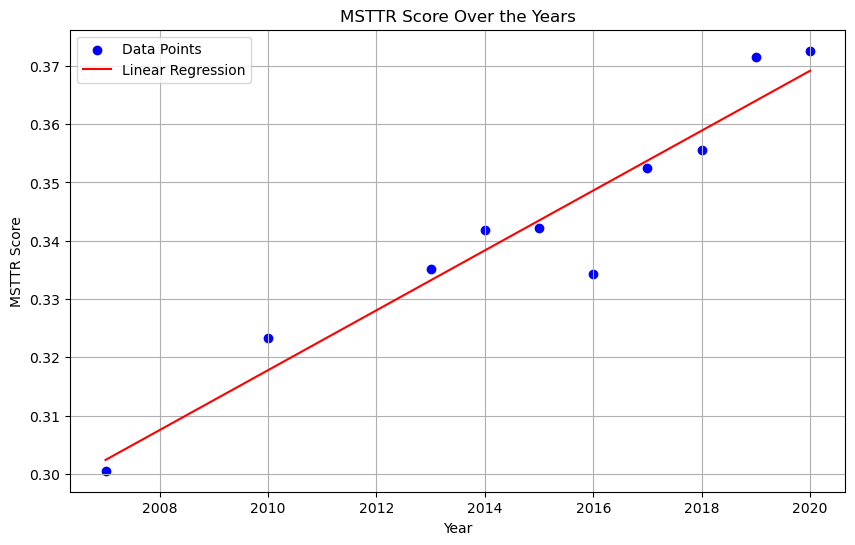

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

years, scores = zip(*(sorted((int(re.search(r'(\d{4})[^0-9]', file_id).group(1)), msttr(corpus.words(file_id), k=1000)) for file_id in corpus.fileids())))

plt.figure(figsize=(10, 6))
plt.scatter(years, scores, color='blue', marker='o', label='Data Points')
plt.xlabel('Year')
plt.ylabel('MSTTR Score')
plt.title('MSTTR Score Over the Years')
plt.grid(axis='both')

# Linear regression
coefficients = np.polyfit(years, scores, 1)
polynomial = np.poly1d(coefficients)
line_x = np.linspace(min(years), max(years), 100)
line_y = polynomial(line_x)
plt.plot(line_x, line_y, color='red', label='Linear Regression')

plt.legend()
plt.show()


In [20]:
import nltk
import re
from nltk.tokenize import word_tokenize, sent_tokenize

# Custom function to count syllables in a word
cmudict = nltk.corpus.cmudict.dict()

def syllables(word):
    if word.lower() in cmudict:
        return len([p for p in cmudict[word.lower()][0] if p[-1].isdigit()])
    else:
        return len(re.findall(r'[aeiou]+', word.lower()))

# Custom function to calculate Flesch-Kincaid readability score
def fk(text):
    words = len(word_tokenize(text))
    sylls = sum([syllables(w) for w in word_tokenize(text)])
    sents = len(sent_tokenize(text))
    return 0.39 * (words/sents) + 11.8 * (sylls/words) - 15.59

# Calculate and print Flesch-Kincaid scores for each file in the corpus
for file_id in corpus.fileids():
    # Extract the year from the file_id using a different regular expression
    year_match = re.search(r'(\d{4})[^0-9]', file_id)

    if year_match:
        year = year_match.group(1)
        full_text = corpus.raw(file_id)
        score = fk(full_text)
        print(f'Year {year} WWDC FK: {score:.3f}')


Year 2016 WWDC FK: 6.285
Year 2017 WWDC FK: 7.985
Year 2013 WWDC FK: 5.787
Year 2014 WWDC FK: 5.971
Year 2015 WWDC FK: 6.533
Year 2019 WWDC FK: 5.940
Year 2020 WWDC FK: 6.981
Year 2010 WWDC FK: 5.462
Year 2007 WWDC FK: 2.970
Year 2018 WWDC FK: 7.665


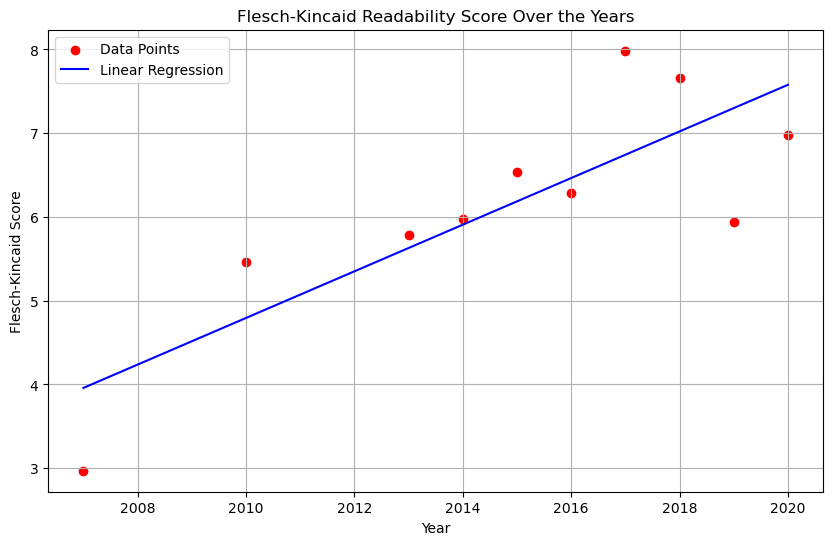

In [21]:
import matplotlib.pyplot as plt
import numpy as np

years, scores = zip(*(sorted((int(re.search(r'(\d{4})[^0-9]', file_id).group(1)), fk(corpus.raw(file_id))) for file_id in corpus.fileids())))

plt.figure(figsize=(10, 6))
plt.scatter(years, scores, color='red', marker='o', label='Data Points')
plt.xlabel('Year')
plt.ylabel('Flesch-Kincaid Score')
plt.title('Flesch-Kincaid Readability Score Over the Years')
plt.grid(axis='both')

# Linear regression
coefficients = np.polyfit(years, scores, 1)
polynomial = np.poly1d(coefficients)
line_x = np.linspace(min(years), max(years), 100)
line_y = polynomial(line_x)
plt.plot(line_x, line_y, color='blue', label='Linear Regression')

plt.legend()
plt.show()